In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from pprint import pprint
import csv
from config import key

In [337]:
url = "https://na1.api.riotgames.com/lol/match/v4/matches/"
api_f= "api_key="

In [338]:
#csv files to work through adjust the file path to needs
#this is match data
file = "data/matchinfo.csv"
#this is a list of game ids to get data from
qfile = "data/queue.csv"

#reading in the game ids
queue = pd.read_csv(qfile, header = None)

#partic_data = response['participants']

#trying to create a loop to iterate through our gameids
#so that we can get more than just the one data set
queue_random = queue.sample(3)
games = []

#jsonifying the api data
for index,row in queue_random.iterrows():
    n_url = (url + str(row[0]) + "/?"+ api_f + key) 
    response = requests.get(n_url).json()
    games.append(response) 
    


In [339]:
#identifying each players individual stats
player_stats = { 
    "player_number" : [],
    "kills": [],
    "assists" : [],
    "deaths" : [],
    "inhibitor_kills" : [],
    "largest_multi" : [],
    "lane" : [],
    "result" : [],}
#identifying each players minion stats
player_minion = {
    "total_minions" : [],
    "creeps_per_min" : []
                }
#identifying each players damage stats
player_dmg = {
    "total_dmg": [],
    "largest_crit" : [],
    "magic_dmg" : [],
    "magic_dmg_2_champ" : [],
    "magic_dmg_taken" : [],
    "physc_dmg" : [],
    "physc_dmg_taken" : [],
    "physc_dmg_2_champ" : [],
    "total_dmg_2_champ" : [],
    "total_dmg_tkn" : [],
    
            }
#identifying each players gold stats
player_gold = {
    
    "total_gold" : [],
    "total_spent" :[]
            }

#identifying each players team stats

team_stats = {
    
    "team": [],
    "towers_killed" : [],
    "dragons_killed" : [],
    "first_tower" : [],
    "first_inhibitor" : [],
    "first_blood" : [],
    "result" : [],
        }


for game in games:
    try:
        players = game["participants"]
        teams = game["teams"]
        for player in players:
            #pprint(player)
            player_stats["player_number"].append(int(player["participantId"]))
            player_stats["lane"].append(player["timeline"]["lane"])
            player_stats["result"].append(int(player["stats"]["win"]))
            player_stats["kills"].append(int(player["stats"]["kills"]))
            player_stats["assists"].append(int(player["stats"]["assists"]))
            player_stats["deaths"].append(int(player["stats"]["deaths"]))
            player_stats["inhibitor_kills"].append(int(player["stats"]["inhibitorKills"]))
            player_stats["largest_multi"].append(int(player["stats"]["largestMultiKill"]))
            #player damage dictionary
            player_dmg["total_dmg"].append(int(player["stats"]["totalDamageDealt"]))
            player_dmg["largest_crit"].append(int(player["stats"]["largestCriticalStrike"]))
            player_dmg["magic_dmg"].append(int(player["stats"]["magicDamageDealt"]))
            player_dmg["magic_dmg_taken"].append(int(player["stats"]["magicalDamageTaken"]))
            player_dmg["magic_dmg_2_champ"].append(int(player["stats"]["magicDamageDealtToChampions"]))
            player_dmg["physc_dmg"].append(int(player["stats"]["physicalDamageDealt"]))
            player_dmg["physc_dmg_2_champ"].append(int(player["stats"]["physicalDamageDealtToChampions"]))
            player_dmg["physc_dmg_taken"].append(int(player["stats"]["physicalDamageTaken"]))
            player_dmg["total_dmg_tkn"].append(int(player["stats"]["totalDamageTaken"]))
            player_dmg["total_dmg_2_champ"].append(int(player["stats"]["totalDamageDealtToChampions"]))
#            player_minion["total_minions"].append(int(player["stats"]["totalMinionsKilled"]))
#            player_minion["creeps_per_min"].append(int(player["timeline"]["creepsPerMinDeltas"]))
            player_gold["total_gold"].append(int(player["stats"]["goldEarned"]))
            player_gold["total_spent"].append(int(player["stats"]["goldSpent"]))


        for team in teams:
            team_stats["team"].append(team["teamId"])
            team_stats["towers_killed"].append(int(team["towerKills"]))
            team_stats["dragons_killed"].append(int(team["dragonKills"]))
            team_stats["first_tower"].append(int(team["firstTower"]))
            team_stats["first_inhibitor"].append(int(team["firstInhibitor"]))
            team_stats["first_blood"].append(int(team["firstBlood"]))
            team_stats["result"].append(team["win"])    
    except:
            
            player_stats["player_number"].append(int(0))
            player_stats["lane"].append(int(0))
            player_stats["result"].append(int(0))
            player_stats["kills"].append(int(0))
            player_stats["assists"].append(int(0))
            player_stats["deaths"].append(int(0))
            player_stats["inhibitor_kills"].append(int(0))
            player_stats["largest_multi"].append(int(0))
            player_dmg["total_dmg"].append(int(0))
            player_dmg["largest_crit"].append(int(0))
            player_dmg["magic_dmg"].append(int(0))
            player_dmg["magic_dmg_taken"].append(int(0))
            player_dmg["magic_dmg_2_champ"].append(int(0))
            player_dmg["physc_dmg"].append(int(0))
            player_dmg["physc_dmg_2_champ"].append(int(0))
            player_dmg["physc_dmg_taken"].append(int(0))
            player_dmg["total_dmg_tkn"].append(int(0))
            player_dmg["total_dmg_2_champ"].append(int(0))
#            player_minion["total_minions"].append("N/a")
#            player_minion["creeps_per_min"].append("N/a")
            player_gold["total_gold"].append(int(0))
            player_gold["total_spent"].append(int(0))
            team_stats["team"].append(int(0))
            team_stats["towers_killed"].append(int(0))
            team_stats["dragons_killed"].append(int(0))
            team_stats["first_tower"].append(int(0))
            team_stats["first_inhibitor"].append(int(0))
            team_stats["first_blood"].append(int(0))
            team_stats["result"].append(int(0))   
            

In [340]:
team_stats

{'team': [100, 200, 100, 200, 100, 200],
 'towers_killed': [5, 0, 4, 4, 8, 1],
 'dragons_killed': [0, 0, 0, 0, 2, 0],
 'first_tower': [1, 0, 1, 0, 1, 0],
 'first_inhibitor': [1, 0, 0, 1, 1, 0],
 'first_blood': [1, 0, 1, 0, 1, 0],
 'result': ['Win', 'Fail', 'Fail', 'Win', 'Win', 'Fail']}

In [341]:
player_stats_df = pd.DataFrame(player_stats)
player_minion_df = pd.DataFrame(player_minion)
player_dmg_df = pd.DataFrame(player_dmg)
player_gold_df = pd.DataFrame(player_gold)
team_stats_df = pd.DataFrame(team_stats)

AttributeError: 'Rectangle' object has no property 'labels'

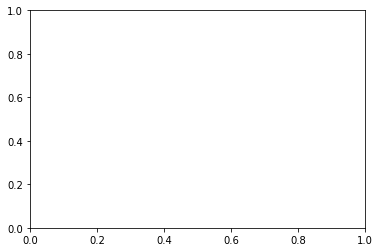

In [355]:
player_gold_df
#group first counts on win and lose 
#x_axis = (len(team_stats_df["result"]))
#team_stats_df.plot(kind = 'bar')
#plt.show()

In [349]:
team_stats_df

,team,towers_killed,dragons_killed,first_tower,first_inhibitor,first_blood,result
0,100,5,0,1,1,1,Win
1,200,0,0,0,0,0,Fail
2,100,4,0,1,0,1,Fail
3,200,4,0,0,1,0,Win
4,100,8,2,1,1,1,Win
5,200,1,0,0,0,0,Fail
